In [ ]:
pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 MB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.40.0.4-py2.py3-none-any.whl size=177697886 sha256=82db75185014a425e7900fbe3277cc4ecce47d0cf94e58b2645386f6d22952ad
  Stored in directory: /root/.cache/pip/wheels/43/f2/b0/5bb4d702a0467e82d77c45088db3eef25114c26b0eec8e7f6a
Successfully built h2o


## H2O

In [ ]:
import h2o
h2o.init(nthreads = -1, max_mem_size = 8)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.18" 2023-01-17; OpenJDK Runtime Environment (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1); OpenJDK 64-Bit Server VM (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpwvvkdrl1
  JVM stdout: /tmp/tmpwvvkdrl1/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpwvvkdrl1/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.4
H2O_cluster_version_age:,18 days
H2O_cluster_name:,H2O_from_python_unknownUser_f4ubzx
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,8 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
data = h2o.import_file("/content/drive/MyDrive/newdataset.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
pop = data.group_by(by='artists').mean('popularity', na="all").get_frame()
pop = pop.sort(['mean_popularity'],  ascending=[False])
pop = pop[:10,:]

Text(0, 0.5, 'Artists')

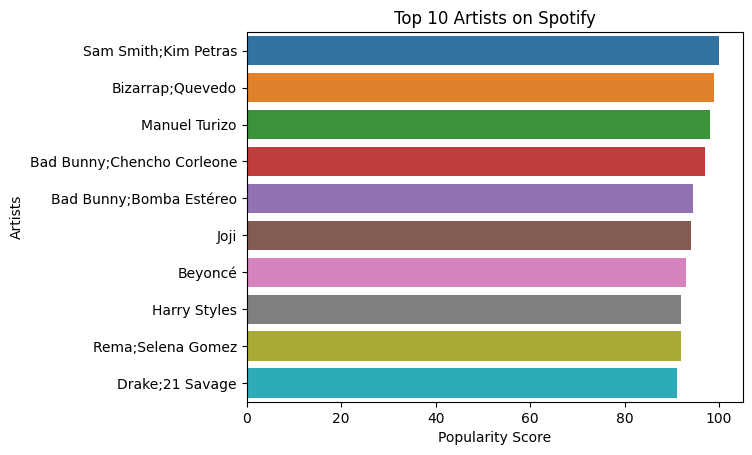

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

x_values = pop["artists"].as_data_frame()["artists"]
y_values = pop["mean_popularity"].as_data_frame()["mean_popularity"]

sns.barplot(x=y_values, y=x_values)

plt.title("Top 10 Artists on Spotify")
plt.xlabel("Popularity Score")
plt.ylabel("Artists")

In [ ]:
import plotly.express as px
fig = px.imshow(data.as_data_frame().corr())
fig.update_layout(title="Heatmap", xaxis_title="X-axis", yaxis_title="Y-axis")
fig.show()

<ipython-input-10-06bce7197531>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fig = px.imshow(data.as_data_frame().corr())


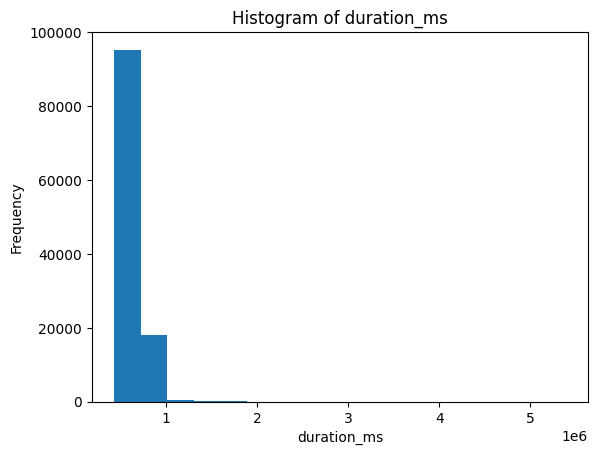

breaks,counts,mids_true,mids,widths
290961,nan,nan,nan,nan
581922,95326,11133,436441,290961
872882,17968,145480,727402,290961
1.16384e+06,539,290970,1.01836e+06,290961
1.4548e+06,83,437780,1.30932e+06,290961
1.74576e+06,30,587013,1.60028e+06,290961
2.03673e+06,13,727890,1.89125e+06,290961
2.32769e+06,10,874586,2.18221e+06,290961
2.61865e+06,3,1.10931e+06,2.47317e+06,290961
2.90961e+06,2,1.26171e+06,2.76413e+06,290961


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
data["duration_ms"].hist()

In [ ]:
#Check for missing values
data.isna().sum()

2.9999999999999996

In [ ]:
data.head()

Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,new_pop
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,1,-6.746,0,0.143,0.0322,1.01e-06,0.358,0.715,87.917,4,acoustic,3
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.42,0.166,1,-17.235,1,0.0763,0.924,5.56e-06,0.101,0.267,77.489,4,acoustic,3
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.359,0,-9.734,1,0.0557,0.21,0,0.117,0.12,76.332,4,acoustic,3
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Soundtrack),Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.905,7.07e-05,0.132,0.143,181.74,3,acoustic,3
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.443,2,-9.681,1,0.0526,0.469,0,0.0829,0.167,119.949,4,acoustic,4
5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.481,6,-8.807,1,0.105,0.289,0,0.189,0.666,98.017,4,acoustic,3
6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.147,2,-8.822,1,0.0355,0.857,2.89e-06,0.0913,0.0765,141.284,3,acoustic,3
7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.444,11,-9.331,1,0.0417,0.559,0,0.0973,0.712,150.96,4,acoustic,4
8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625,0.414,0,-8.7,1,0.0369,0.294,0,0.151,0.669,130.088,4,acoustic,3
9,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56,205594,False,0.442,0.632,1,-6.77,1,0.0295,0.426,0.00419,0.0735,0.196,78.899,4,acoustic,3


In [ ]:
from h2o.frame import H2OFrame


In [ ]:
datadf = data.as_data_frame()


In [ ]:
datadf['pop'] = datadf['popularity'].apply(lambda x: 'popular' if x >= 50 else 'notpopular')


In [ ]:
datadf=datadf.drop('new_pop', axis=1)
datadf.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,pop
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,popular
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,popular
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,popular
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,popular
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,popular


In [ ]:
newdata = H2OFrame(datadf)
newdata

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,pop
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,1,-6.746,0,0.143,0.0322,1.01e-06,0.358,0.715,87.917,4,acoustic,popular
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.42,0.166,1,-17.235,1,0.0763,0.924,5.56e-06,0.101,0.267,77.489,4,acoustic,popular
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.359,0,-9.734,1,0.0557,0.21,0,0.117,0.12,76.332,4,acoustic,popular
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Soundtrack),Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.905,7.07e-05,0.132,0.143,181.74,3,acoustic,popular
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.443,2,-9.681,1,0.0526,0.469,0,0.0829,0.167,119.949,4,acoustic,popular
5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.481,6,-8.807,1,0.105,0.289,0,0.189,0.666,98.017,4,acoustic,popular
6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.147,2,-8.822,1,0.0355,0.857,2.89e-06,0.0913,0.0765,141.284,3,acoustic,popular
7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.444,11,-9.331,1,0.0417,0.559,0,0.0973,0.712,150.96,4,acoustic,popular
8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625,0.414,0,-8.7,1,0.0369,0.294,0,0.151,0.669,130.088,4,acoustic,popular
9,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56,205594,False,0.442,0.632,1,-6.77,1,0.0295,0.426,0.00419,0.0735,0.196,78.899,4,acoustic,popular


In [ ]:
newdata = newdata.drop(['popularity','track_id'])
newdata = newdata.head(10000)



## Splitting Testing and Training

In [ ]:
y = "pop"
x = newdata.names
x.remove(y)
train, test = newdata.split_frame([0.8])

## Auto Ml

In [ ]:
from h2o.automl import H2OAutoML
aml = H2OAutoML(max_models = 20, max_runtime_secs=300)

In [ ]:
aml.train(x=x, y=y, training_frame=train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_1_AutoML_1_20230516_211242


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    103                103                         65947                  9            15           13.5437       29            52            45.4951

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.05749425288448896
RMSE: 0.23977959230194917
LogLoss: 0.20931650284058073
Mean Per-Class Error: 0.07878415300546449
AUC: 0.9824513614094592
AUCPR: 0.957071018586769
Gini: 0.9649027228189184

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.48026016226407403
            notpopular    popular    Error    Rate
----------  ------------  ---------  -------  --------------
notpopular  5636          220        0.0376   (220.0/5856.0)
popular     261           1914       0.12     (261.0/2175.0)
Total       5897          2134       0.0599   (481.0/8031.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.48026      0.888373  172
max f2                       0.354239     0.919683  212
max f0point5                 0.527299     0.909045  158
max accuracy                 0.50063      0.940356  166
max precision                0.975667     1         0
max recall                   0.0427064    1         357
max specificity              0.975667     1         0
max absolute_mcc             0.48026      0.847524  172
max min_per_class_accuracy   0.387172     0.931865  201
max mean_per_class_accuracy  0.354239     0.934846  212
max tns                      0.975667     5856      0
max fns                      0.975667     2172      0
max fps                      0.00272923   5856      399
max tps                      0.0427064    2175      357
max tnr                      0.975667     1         0
max fnr                      0.975667     0.998621  0
max fpr                      0.00272923   1         399
max tpr                      0.0427064    1         357

Gains/Lift Table: Avg response rate: 27.08 %, avg score: 27.08 %
group    cumulative_data_fraction    lower_threshold    lift        cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ----------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100859                   0.932985           3.69241     3.69241            1                0.949585    1                           0.949585            0.0372414       0.0372414                  269.241   269.241            0.0372414
2        0.0200473                   0.910564           3.69241     3.69241            1                0.92064     1                           0.935202            0.0367816       0.074023                   269.241   269.241            0.074023
3        0.0300087                   0.890111           3.69241     3.69241            1                0.899504    1                           0.923352            0.0367816       0.110805                   269.241   269.241            0.110805
4        0.0400946                   0.871975           3.69241     3.69241            1                0.881411    1                           0.912802            0.0372414       0.148046                   269.241   269.241            0.148046
5        0.050056                    0

In [ ]:
aml.leaderboard


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_1_AutoML_1_20230516_211242,0.900517,0.347745,0.759747,0.178053,0.333078,0.110941
GLM_1_AutoML_1_20230516_211242,0.883,0.394075,0.741757,0.183622,0.354859,0.125925
XGBoost_1_AutoML_1_20230516_211242,0.869149,0.39725,0.680636,0.203707,0.359467,0.129217


In [ ]:
aml.get_best_model()


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_1_AutoML_1_20230516_211242


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    103                103                         65947                  9            15           13.5437       29            52            45.4951

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.05749425288448896
RMSE: 0.23977959230194917
LogLoss: 0.20931650284058073
Mean Per-Class Error: 0.07878415300546449
AUC: 0.9824513614094592
AUCPR: 0.957071018586769
Gini: 0.9649027228189184

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.48026016226407403
            notpopular    popular    Error    Rate
----------  ------------  ---------  -------  --------------
notpopular  5636          220        0.0376   (220.0/5856.0)
popular     261           1914       0.12     (261.0/2175.0)
Total       5897          2134       0.0599   (481.0/8031.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.48026      0.888373  172
max f2                       0.354239     0.919683  212
max f0point5                 0.527299     0.909045  158
max accuracy                 0.50063      0.940356  166
max precision                0.975667     1         0
max recall                   0.0427064    1         357
max specificity              0.975667     1         0
max absolute_mcc             0.48026      0.847524  172
max min_per_class_accuracy   0.387172     0.931865  201
max mean_per_class_accuracy  0.354239     0.934846  212
max tns                      0.975667     5856      0
max fns                      0.975667     2172      0
max fps                      0.00272923   5856      399
max tps                      0.0427064    2175      357
max tnr                      0.975667     1         0
max fnr                      0.975667     0.998621  0
max fpr                      0.00272923   1         399
max tpr                      0.0427064    1         357

Gains/Lift Table: Avg response rate: 27.08 %, avg score: 27.08 %
group    cumulative_data_fraction    lower_threshold    lift        cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ----------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100859                   0.932985           3.69241     3.69241            1                0.949585    1                           0.949585            0.0372414       0.0372414                  269.241   269.241            0.0372414
2        0.0200473                   0.910564           3.69241     3.69241            1                0.92064     1                           0.935202            0.0367816       0.074023                   269.241   269.241            0.074023
3        0.0300087                   0.890111           3.69241     3.69241            1                0.899504    1                           0.923352            0.0367816       0.110805                   269.241   269.241            0.110805
4        0.0400946                   0.871975           3.69241     3.69241            1                0.881411    1                           0.912802            0.0372414       0.148046                   269.241   269.241            0.148046
5        0.050056                    0

In [ ]:
aml.predict(test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


predict,notpopular,popular
notpopular,0.572548,0.427452
popular,0.354132,0.645868
popular,0.38621,0.61379
popular,0.288085,0.711915
popular,0.432755,0.567245
popular,0.40661,0.59339
popular,0.273212,0.726788
notpopular,0.75459,0.24541
notpopular,0.71208,0.28792
popular,0.378345,0.621655


In [ ]:
h2o.automl.get_leaderboard(aml,  extra_columns = "ALL")

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
GBM_1_AutoML_1_20230516_211242,0.900517,0.347745,0.759747,0.178053,0.333078,0.110941,5045,0.060101,GBM
GLM_1_AutoML_1_20230516_211242,0.883,0.394075,0.741757,0.183622,0.354859,0.125925,5080,0.005328,GLM
XGBoost_1_AutoML_1_20230516_211242,0.869149,0.39725,0.680636,0.203707,0.359467,0.129217,17622,0.016963,XGBoost


## Logistic Regression

In [ ]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

response = "pop"
model = H2OGeneralizedLinearEstimator(family="binomial", alpha=0.5, lambda_=0.01)
model.train(x=x, y=response, training_frame=train)
predictions = model.predict(test)
print(model.model_performance(test_data=test))

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
ModelMetricsBinomialGLM: glm
** Reported on test data. **

MSE: 0.16345333677102852
RMSE: 0.40429362692358695
LogLoss: 0.49090184932277303
AUC: 0.7731695722857218
AUCPR: 0.4852237429367358
Gini: 0.5463391445714436
Null degrees of freedom: 2025
Residual degrees of freedom: 2008
Null deviance: 2347.299786828102
Residual deviance: 1989.134293455876
AIC: 2025.134293455876

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.30368470652562785
            notpopular    popular    Error    Rate
----------  ------------  ---------  -------  --------------
notpopular  1013          474        0.3188   (474.0/1487.0)
popular     141           398        0.2616   (141.0/539.0)
Total       1154          872        0.3036   (615.0/2026.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric

## SVM

In [ ]:
import h2o
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
model = H2OGeneralizedLinearEstimator(family="binomial", solver="L_BFGS", alpha=0.5, lambda_=0.01)
model.train(x=x, y=y, training_frame=train)
predictions = model.predict(test)
print(model.model_performance(test_data=test))

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
ModelMetricsBinomialGLM: glm
** Reported on test data. **

MSE: 0.16344441109540966
RMSE: 0.4042825881674966
LogLoss: 0.49082186221395563
AUC: 0.7730741254134471
AUCPR: 0.48575628609004684
Gini: 0.5461482508268942
Null degrees of freedom: 2025
Residual degrees of freedom: 2008
Null deviance: 2347.299786828102
Residual deviance: 1988.810185690948
AIC: 2024.810185690948

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.30507663686331615
            notpopular    popular    Error    Rate
----------  ------------  ---------  -------  --------------
notpopular  1014          473        0.3181   (473.0/1487.0)
popular     142           397        0.2635   (142.0/539.0)
Total       1156          870        0.3036   (615.0/2026.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric

## Random Forest

In [ ]:
from h2o.estimators.random_forest import H2ORandomForestEstimator
model = H2ORandomForestEstimator(ntrees=50, max_depth=20, min_rows=5, distribution="bernoulli")
model.train(x=x, y=y, training_frame=train)
predictions = model.predict(test)
print(model.model_performance(test_data=test))

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.11950660382198565
RMSE: 0.3456972719330971
LogLoss: 0.3705125149964222
Mean Per-Class Error: 0.18553312380769388
AUC: 0.8937376870415586
AUCPR: 0.740407662862753
Gini: 0.7874753740831173

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3615556306391955
            notpopular    popular    Error    Rate
----------  ------------  ---------  -------  --------------
notpopular  1178          309        0.2078   (309.0/1487.0)
popular     88            451        0.1633   (88.0/539.0)
Total       1266          760        0.196    (397.0/2026.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1         

## XGBoost

In [ ]:
import h2o
from h2o.estimators.xgboost import H2OXGBoostEstimator
model = H2OXGBoostEstimator(ntrees=50, max_depth=6, learn_rate=0.1, distribution="bernoulli", booster="gbtree")
model.train(x=x, y=y, training_frame=train)
predictions = model.predict(test)
print(model.model_performance(test_data=test))


xgboost Model Build progress: |██████████████████████████████████████████████████| (done) 100%
xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%
ModelMetricsBinomial: xgboost
** Reported on test data. **

MSE: 0.12137465660633798
RMSE: 0.34838865740195674
LogLoss: 0.37436180843446504
Mean Per-Class Error: 0.20485331749622265
AUC: 0.8855454757558706
AUCPR: 0.7290926990623038
Gini: 0.7710909515117412

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.38127187887827557
            notpopular    popular    Error    Rate
----------  ------------  ---------  -------  --------------
notpopular  1264          223        0.15     (223.0/1487.0)
popular     140           399        0.2597   (140.0/539.0)
Total       1404          622        0.1792   (363.0/2026.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1

## Gradient Boosting Machine

In [ ]:
import h2o
from h2o.estimators.gbm import H2OGradientBoostingEstimator
model = H2OGradientBoostingEstimator(ntrees=100, max_depth=5, learn_rate=0.1, distribution="bernoulli")
model.train(x=x, y=y, training_frame=train)
predictions = model.predict(test)
print(model.model_performance(test_data=test))


gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.11080552447571172
RMSE: 0.3328746377778153
LogLoss: 0.34868622028013746
Mean Per-Class Error: 0.17945883494927592
AUC: 0.9039904278639989
AUCPR: 0.7753806587508052
Gini: 0.8079808557279977

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3804709888245127
            notpopular    popular    Error    Rate
----------  ------------  ---------  -------  --------------
notpopular  1254          233        0.1567   (233.0/1487.0)
popular     109           430        0.2022   (109.0/539.0)
Total       1363          663        0.1688   (342.0/2026.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1      

## Neural Networks

In [ ]:
import h2o
from h2o.estimators.deeplearning import H2ODeepLearningEstimator


model = H2ODeepLearningEstimator(
    epochs=10,                  
    hidden=[5, 5],            
    activation="Rectifier",     
    l1=1e-5,                    
    l2=1e-5,                   
    seed=1234                   
)

model.train(x=x, y=y, training_frame=train)
print(model.model_performance(test_data=test))

deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.13790765204897426
RMSE: 0.3713591954549857
LogLoss: 0.41706292971368936
Mean Per-Class Error: 0.21036802567208945
AUC: 0.8528664629634943
AUCPR: 0.6418728742385619
Gini: 0.7057329259269887

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3565941173574403
            notpopular    popular    Error    Rate
----------  ------------  ---------  -------  --------------
notpopular  1060          427        0.2872   (427.0/1487.0)
popular     72            467        0.1336   (72.0/539.0)
Total       1132          894        0.2463   (499.0/2026.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.356594     0.651779  239
max f2                       0.24668      0